In [3]:
!pip install Multi-Template-Matching

     |████████████████████████████████| 47.6 MB 1.7 MB/s 


In [4]:
# 1st import the package and check its version
import MTM
print("MTM version : ", MTM.__version__)

from MTM import matchTemplates, drawBoxesOnRGB
from MTM.NMS import NMS

import cv2
print("Opencv version: ", cv2.__version__)
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

MTM version :  1.6.3
Opencv version:  4.5.4


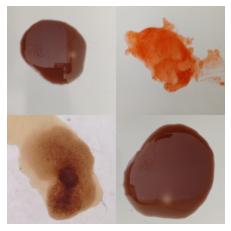

In [10]:
image = io.imread('/content/sample_data/bahan_bahan.jpg')
plt.axis("off")
plt.imshow(image, cmap="gray")

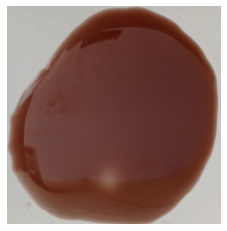

In [40]:
temp0 = image[645:640+530, 635:630+520]
plt.axis("off")
plt.imshow(temp0, cmap="gray")

In [46]:
# 1st format the template into a list of tuple (label, templateImage)
listTemplate = [('temp0', temp0)]

# Then call the function matchTemplates (here a single template)
Hits = matchTemplates(listTemplate, image, N_object=3,score_threshold=0.4, method=cv2.TM_CCOEFF_NORMED, maxOverlap=0.3)

In [47]:
print("Found {} hits".format( len(Hits.index) ) )
Hits

Found 3 hits


,TemplateName,BBox,Score
0,temp0,"(635, 645, 515, 525)",1.000000
1,temp0,"(0, 670, 515, 525)",0.576976
2,temp0,"(0, 19, 515, 525)",0.450507


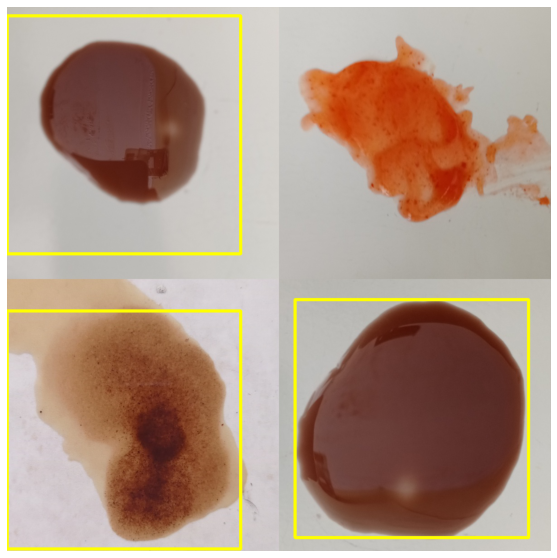

In [48]:
Overlay = drawBoxesOnRGB(image, Hits, boxThickness=5)
plt.figure(figsize = (10,10))
plt.axis("on")
plt.imshow(Overlay)